# Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../ift6758/data')

from question_1 import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [2]:
df = get_player_stats(2018, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2018_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

## 1.1
Sort the goalies by their save percentage (‘SV%’), which is the ratio of their shots saved over the total number of shots they faced. What issues do you notice by using this metric to rank goalies? What could be done to deal with this? Add this discussion to your blog post (no need for the dataframe or a plot yet).	
Note: You don’t need to create a fancy new metric here. If you’d like, you can do a sanity check against the official NHL stats webpage. You also don’t need to reproduce any particular ranking on the NHL page; if your approach is reasonable you will get full marks.

A: The main problem is that goalies who performed well over very small sample size end up near the top of the list. If the goalie's sample size is too small to be a reliable measure of his performance, we don't want to include him in a list of top performing goalies. One simple filter would be to only keep goalies who played in at least half of the games (>= 41GP)

In [3]:
df.sort_values('SV%', ascending = False, inplace = True)
df.head(10)

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,...,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
27,29,Scott Foster,36,CHI,1,0,0,0,0,0,...,14,0,NaN,0,NaN,NaN,0,0,0,0
88,95,Adam Wilcox,25,BUF,1,0,0,1,0,0,...,39,0,NaN,0,NaN,NaN,0,0,0,0
51,55,Marek Langhamer,23,ARI,1,0,0,0,0,0,...,29,0,NaN,0,NaN,NaN,0,0,0,0
16,17,Oscar Dansk,23,VEG,4,3,3,0,0,5,...,169,3,1.000,0,NaN,NaN,0,0,0,0
3,4,Kenneth Appleby,22,NJD,3,1,0,1,0,3,...,124,0,.000,0,NaN,NaN,0,0,0,0
37,39,Andrew Hammond,29,COL,1,1,0,1,0,2,...,58,1,1.000,0,NaN,NaN,0,0,0,0
83,90,Linus Ullmark,24,BUF,5,3,1,2,0,8,...,240,2,.667,0,NaN,NaN,0,0,0,0
60,64,Curtis McElhinney,34,TOR,18,15,11,5,1,35,...,979,8,.533,1,76,11.34,0,1,1,0
43,45,Carter Hutton,32,STL,32,26,17,7,3,56,...,1610,19,.731,2,79,15.09,0,0,0,2
70,77,Antti Raanta,28,ARI,47,46,21,17,6,97,...,2599,32,.696,6,80,24.82,0,0,0,0


## 1.2
Filter out the goalies using your proposed approach above, and produce a bar plot with player names on the y-axis and save percentage (‘SV%’) on the x-axis. You can keep the top 20 goalies. Include this figure in your blog post; ensure all of the axes are labeled and the title is appropriate

In [4]:
# Teams have 2 goalies in general and the primary goalie will usually play in atleast half of the games(GP==41). Hence the chosen filter makes sure we are comparing only primary goalies
df['GP'] = pd.to_numeric(df['GP'])
df['SV%'] = pd.to_numeric(df['SV%'])
df = df[ df['GP'] >= 41].head(20)

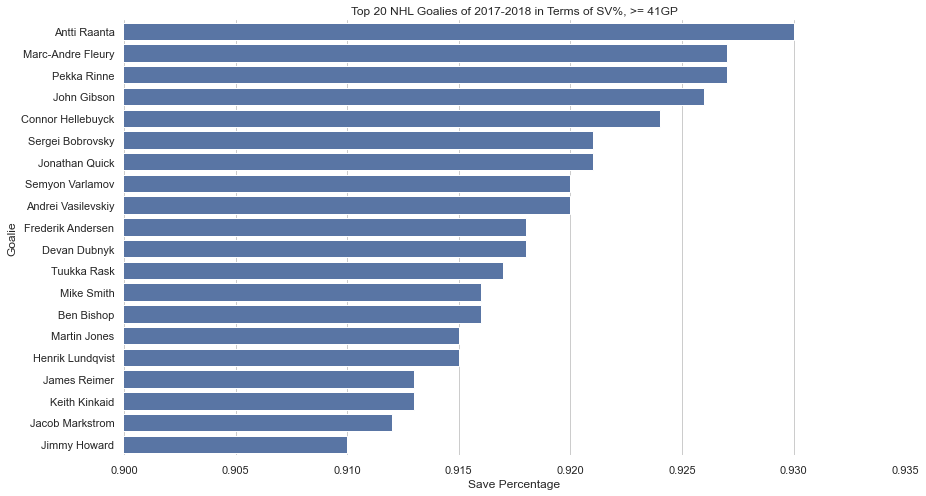

In [5]:
sns.set_theme(style='whitegrid')
f, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='SV%', y="Player", data=df, label='Total', color='b')
ax.set(xlim=(0.9, 0.935), ylabel='Goalie', xlabel='Save Percentage', title = 'Top 20 NHL Goalies of 2017-2018 in Terms of SV%, >= 41GP')
sns.despine(left=True, bottom=True)
figure = ax.get_figure()  
figure.savefig("../../ift6758-blog-template-main/figures/question_1_2.png")

## 1.3
Save percentage is obviously not a very comprehensive feature. Discuss what other features could potentially be useful in determining a goalie’s performance. You do not need to implement anything unless you really want to, all that’s required is a short paragraph of discussion.

A: 
One of the problems with save percentage is that the quality of shots faced can vary a lot from goalie to goalie. For example, a goalie who plays for a weak defence may face harder shots than average. Adjusted measures of save percetage can help account for this. For example, even strengh save percentage can give a clearer picture of the goalie's performance by removing powerplay scoring, which is very volatile and dependant on the quality of the team's penalty kill. Other even strengh metrics allow us to go deeper into this type of analysis. One such metric is HDsc SV% (save percentage against high-danger scoring chances at even strengh).

Another problem is that SV% does not take worload into account. If two goalies play at the same level but play in a different number of games, the one who plays more has a bigger impact on his team's success. One metric that can help looking at a goalie's total contribution for a season is even strenght xGA - even strengh GA. xGA is an estimate of expected GA based on shots faced by location against league average shooting% from those locations. For example, in the 2017-2018 season, Anti Raanta let in 74 even strengh goals and had an xGA of 84.9. So for that season, he let it 14.9 less even strengh goals than expected (see 'NHL advanced' section of https://www.hockey-reference.com/players/r/raantan01.html).